<h1>Demonstration of IVT Faults<h1>

In this notebook, we will go over some possible faults of an IVT system. While I am presenting these for a batch reaction, they are conceptually applicable to analysis of a continuous PFR system operating at a steady state. 

In [77]:
#Importing model and parameters
using Pkg
Pkg.activate("../IVTmodel")
Pkg.instantiate()
include("../modules/IVTmodel.jl")
#Generates settings for parameters used
fittingmodel = setupmodel_IVT4()
#Imports calibration data from csv files
modeldata = importakamadata()
osumidata = importosumidata()
#Imports PPiase validation data
PPiasedata = importakamaPPiasedata();
akamafittedparametersmatrix = Matrix(CSV.read("../outputs/fittedparameters.csv", DataFrame,header=false))
fittedparamslist = reshape(akamafittedparametersmatrix,(size(akamafittedparametersmatrix)[1],))
covariancemat = Matrix(CSV.read("../outputs/covariancematrix.csv", DataFrame,header=false))
fittedparams = fullparameterset(fittingmodel,fittedparamslist)
printresidual(fittingmodel,modeldata,osumidata,fittedparamslist)

  Activating project at `C:\Users\ChemeGrad2021\Documents\Braatz Group\MRNA Synthesis\Published code\IVT2.0\IVTmodel`
Precompiling project...
  ? Metrics


Model has 25 fitted parameters, 17 of which have a bayesian prior
Total Residual:                        1007.3
Components of residual:
Concentration Trajectories (Figure 2): 418.6
Initial Reaction Rate (Figure 3A):     135.2
Mg2PPi solubility (Figure 3B):         216.4
Parameter priors:                      159.5
pH Effect Data:                        77.6


<h2>Characterizing a correctly operating IVT system<h2>

IVT polymerizes nucleoside triphosphate (NTP) monomers into RNA, releasing a phosphate byproduct that decreases the pH of the reaction solution. In a batch reaction mode, output data of IVT will consist of a monotonic decrease in NTP concentrations, a monotonic increase in RNA concentration, and a monotonic decrease in NTP concentraitons. Currently, online measurement of pH is the industry standard, while our industrial collaborator has developed technology that can provide in-line measurements of RNA and NTP concentrations. So we can consider these to be known observables for this work. However, consider that I am presenting this data without the random noise that we expect to exist in real process data.

First, lets look at a correctly operating IVT reaction. In the csv file in this folder, I've put descriptions of an IVT scheme that we can put into my plotting software. These conditions are used by our industrial collaborator for some of their batch reactions. 

In this visualization, I am plotting the total RNA concentration, the concentration of CTP (the limiting of the four nucleotides), and the pH over time.

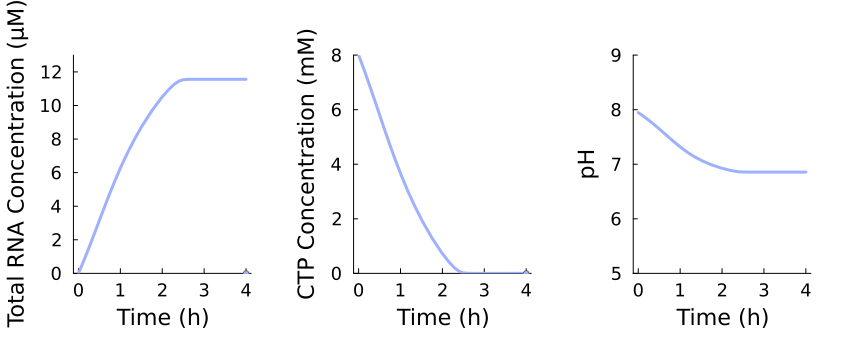

In [78]:
standardkwargs = (labels = [""],dataerrorbars = false, precip = false, seperateDNA = true, OAccounterion = false, mcuncertainty = false)
pltRNA = plotfromcsv(fittingmodel,fittedparamslist,covariancemat,"arrantaprocess.csv";range = [1],standardkwargs...)
plot!(ylims = (0,13))
pltpH = plotfromcsv(fittingmodel,fittedparamslist,covariancemat,"arrantaprocess.csv";range = [2],standardkwargs...)
plot!(ylims = (5,9))
pltCTP = plotfromcsv(fittingmodel,fittedparamslist,covariancemat,"arrantaprocess.csv";range = [3],standardkwargs...)
plot(pltRNA,pltCTP,pltpH, layout = (1,3), size = (850,350), bottommargin = 10mm, leftmargin = 5mm, topmargin = 12mm)

There are a number of possible faults in batch IVT operation. I will go over the classes of faults for the rest of this notebook. 

<h1>Sensor faults<h1>


1. Shifting of pH signal

A poorly calibrated pH sensor can exhibit systematic error of up to one pH unit. In this example, the pH measurement is shifted down by systematic measurement error. 

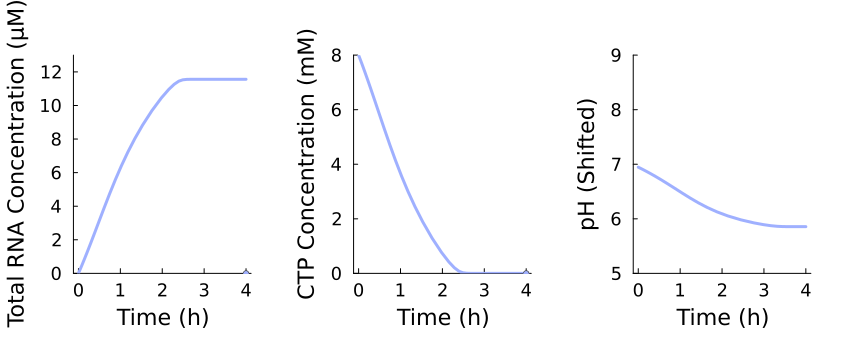

In [79]:
standardkwargs = (labels = [""],dataerrorbars = false, precip = false, seperateDNA = true, OAccounterion = false, mcuncertainty = false)
pltRNA = plotfromcsv(fittingmodel,fittedparamslist,covariancemat,"arrantaprocess.csv";range = [1],maximumyield = true, standardkwargs...)
plot!(ylims = (0,13))
pltpH = plotfromcsv(fittingmodel,fittedparamslist,covariancemat,"arrantaprocess.csv";range = [4],standardkwargs...)
plot!(ylims = (5,9))
pltCTP = plotfromcsv(fittingmodel,fittedparamslist,covariancemat,"arrantaprocess.csv";range = [3],standardkwargs...)
plot(pltRNA,pltCTP,pltpH, layout = (1,3), size = (850,350), bottommargin = 10mm, leftmargin = 5mm, topmargin = 12mm)

2. Scaling of Raman signals. 

In this case study, we are assuming that RNA and NTP concentrations are quantified by Raman spectroscopy, which needs to be calibrated to a set of standards. If the sensitivity of this method shifts between calibration and a process run, the Raman data can be off by a scaling factor. 

In this case, we are shifting both signals down by a factor of 0.8. (The pH measurment is the same)

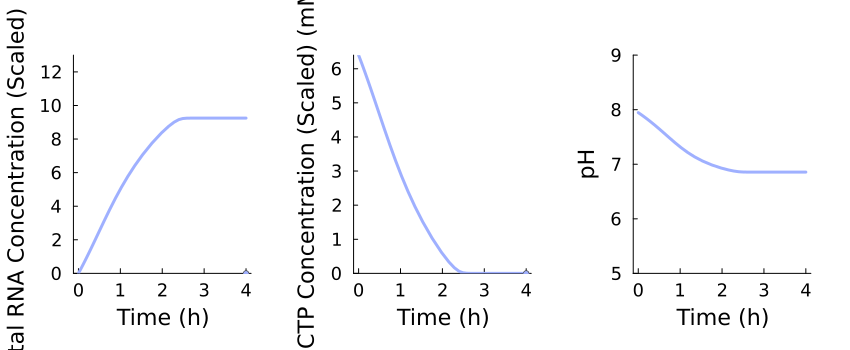

In [80]:
standardkwargs = (labels = [""],dataerrorbars = false, precip = false, seperateDNA = true, OAccounterion = false, mcuncertainty = false)
pltRNA = plotfromcsv(fittingmodel,fittedparamslist,covariancemat,"arrantaprocess.csv";range = [11],maximumyield = true, standardkwargs...)
plot!(ylims = (0,13))
pltpH = plotfromcsv(fittingmodel,fittedparamslist,covariancemat,"arrantaprocess.csv";range = [2],standardkwargs...)
plot!(ylims = (5,9))
pltCTP = plotfromcsv(fittingmodel,fittedparamslist,covariancemat,"arrantaprocess.csv";range = [12],standardkwargs...)
plot(pltRNA,pltCTP,pltpH, layout = (1,3), size = (850,350), bottommargin = 10mm, leftmargin = 5mm, topmargin = 12mm)

<h1>Actuator faults<h1>

In this case, the only "actuation" is in the addition of components to the IVT reaction mixture. Different faults in actuation can lead to different characteristic behavior.

1. Initial pH too low

In this case, the actual initial pH of the IVT mixture is too low, which affects the reaction rate. You can control this with the NaperNTP keyword argument, for which the default value is 3.95 

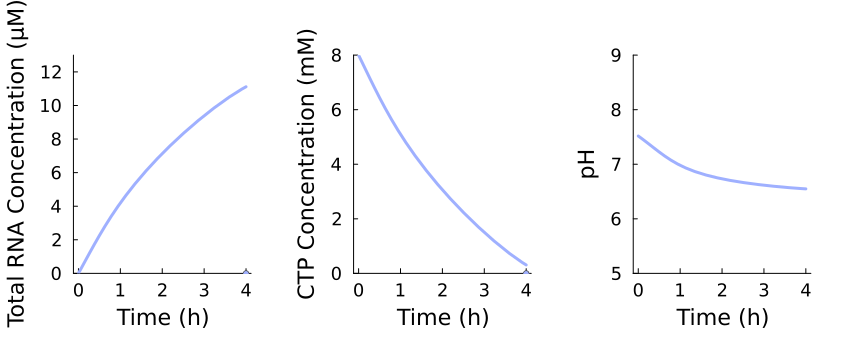

In [81]:
NaperNTP = 3.7

lowpHkwargs = (NaperNTP = NaperNTP, labels = [""],dataerrorbars = false, precip = false, seperateDNA = true, OAccounterion = false, mcuncertainty = false)
pltRNA = plotfromcsv(fittingmodel,fittedparamslist,covariancemat,"arrantaprocess.csv";range = [1],lowpHkwargs...)
plot!(ylims = (0,13))
pltpH = plotfromcsv(fittingmodel,fittedparamslist,covariancemat,"arrantaprocess.csv";range = [2],lowpHkwargs...)
plot!(ylims = (5,9))
pltCTP = plotfromcsv(fittingmodel,fittedparamslist,covariancemat,"arrantaprocess.csv";range = [3],lowpHkwargs...)
plot(pltRNA,pltCTP,pltpH, layout = (1,3), size = (850,350), bottommargin = 10mm, leftmargin = 5mm, topmargin = 12mm)

2. Failure to add enough T7 RNA polymerase

The T7 RNA Polymerase enzyme is the primary enzyme that catalyzes IVT. It is temperature sensitive - if the stock solution used for IVT was degraded, it would decrease the reaction rate.

For this data I am simulating the standard conditions with only 0.25 times the amount of active T7 RNA polymerase

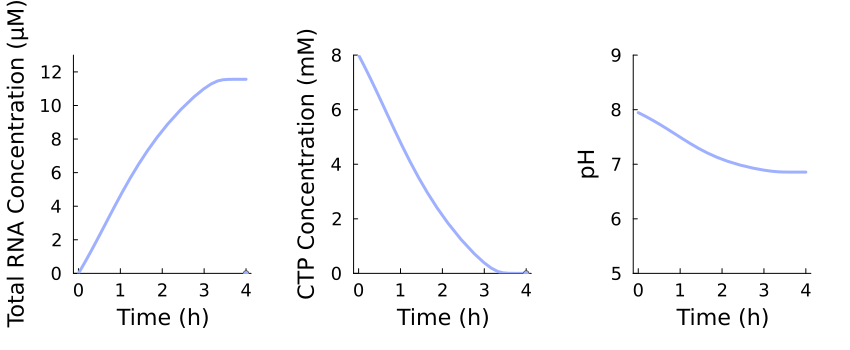

In [82]:
standardkwargs = (labels = [""],dataerrorbars = false, precip = false, seperateDNA = true, OAccounterion = false, mcuncertainty = false)
pltRNA = plotfromcsv(fittingmodel,fittedparamslist,covariancemat,"arrantaprocess.csv";range = [5],standardkwargs...)
plot!(ylims = (0,13))
pltpH = plotfromcsv(fittingmodel,fittedparamslist,covariancemat,"arrantaprocess.csv";range = [6],standardkwargs...)
plot!(ylims = (5,9))
pltCTP = plotfromcsv(fittingmodel,fittedparamslist,covariancemat,"arrantaprocess.csv";range = [7],standardkwargs...)
plot(pltRNA,pltCTP,pltpH, layout = (1,3), size = (850,350), bottommargin = 10mm, leftmargin = 5mm, topmargin = 12mm)

3. Failure to add pyrophosphatase

Inorganic pyrophosphate is a byproduct of IVT that inhibits the reaction rate. To remove this byproduct, the pyrophosphatase enzyme is added, which converts pyrophosphate to phosphate. The pyrophosphatse enzyme is temperature sensitive - if the enzyme added to an IVT reaction was highly degraded, we would see a buildup of pyrophosphate that would manifest itself in a slowing reaction rate over time. 

Note that the initial reaction rate is the same as that of the standard conditions. 

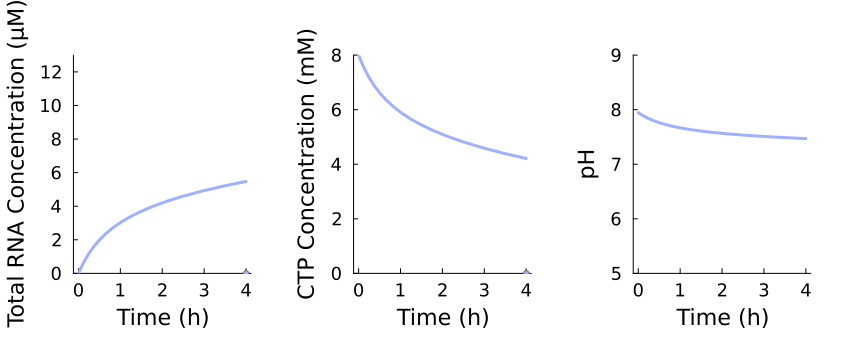

In [83]:
standardkwargs = (labels = [""],dataerrorbars = false, precip = false, seperateDNA = true, OAccounterion = false, mcuncertainty = false)
pltRNA = plotfromcsv(fittingmodel,fittedparamslist,covariancemat,"arrantaprocess.csv";range = [8],standardkwargs...)
plot!(ylims = (0,13))
pltpH = plotfromcsv(fittingmodel,fittedparamslist,covariancemat,"arrantaprocess.csv";range = [9],standardkwargs...)
plot!(ylims = (5,9))
pltCTP = plotfromcsv(fittingmodel,fittedparamslist,covariancemat,"arrantaprocess.csv";range = [10],standardkwargs...)
plot(pltRNA,pltCTP,pltpH, layout = (1,3), size = (850,350), bottommargin = 10mm, leftmargin = 5mm, topmargin = 12mm)

Another possibility owing to a lack of the pyrophosphatase enzyme is the crystallization of the pyrophosphate byproduct. It is difficult to predict when this happens from first principles, but it would be charactarized by a rapid halting of the reaction. 

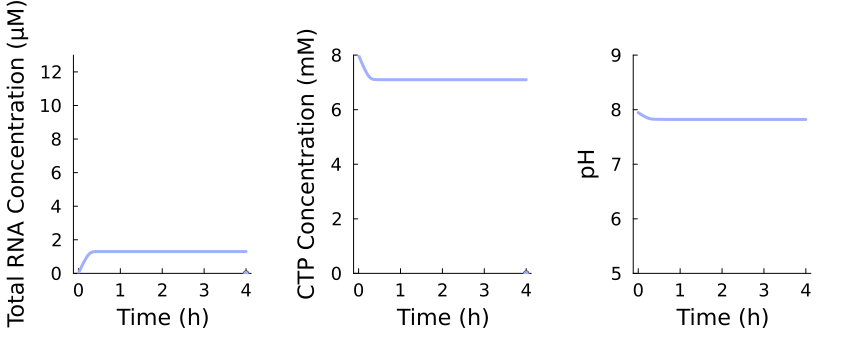

In [84]:
precipkwargs = (labels = [""],dataerrorbars = false, precip = true, seperateDNA = true, OAccounterion = false, mcuncertainty = false)
pltRNA = plotfromcsv(fittingmodel,fittedparamslist,covariancemat,"arrantaprocess.csv";range = [8],precipkwargs...)
plot!(ylims = (0,13))
pltpH = plotfromcsv(fittingmodel,fittedparamslist,covariancemat,"arrantaprocess.csv";range = [9],precipkwargs...)
plot!(ylims = (5,9))
pltCTP = plotfromcsv(fittingmodel,fittedparamslist,covariancemat,"arrantaprocess.csv";range = [10],precipkwargs...)
plot(pltRNA,pltCTP,pltpH, layout = (1,3), size = (850,350), bottommargin = 10mm, leftmargin = 5mm, topmargin = 12mm)